In [1]:
import pandas as pd


# 데이터 로딩
data = pd.read_csv("C:/Users/Chan's Victus/Documents/어트랙티브/과제/UserCarData.csv")

In [2]:
data

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8124,Hyundai,2013,320000,110000,Central,Texas,Plano,Petrol,Individual,Manual,First_Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5,N
7902,8125,Hyundai,2007,135000,119000,Central,Texas,Port Arthur,Diesel,Individual,Manual,Fourth_Above_Owner,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5,N
7903,8126,Maruti,2009,382000,120000,Central,Texas,Port Arthur,Diesel,Individual,Manual,First_Owner,19.30,1248,73.90,190Nm@ 2000rpm,5,N
7904,8127,Tata,2013,290000,25000,East,Massachusetts,Lunenburg,Diesel,Individual,Manual,First_Owner,23.57,1396,70.00,140Nm@ 1800-3000rpm,5,N


In [3]:
data.dtypes

Sales_ID               int64
name                  object
year                   int64
selling_price          int64
km_driven              int64
Region                object
State or Province     object
City                  object
fuel                  object
seller_type           object
transmission          object
owner                 object
mileage              float64
engine                 int64
max_power            float64
torque                object
seats                  int64
sold                  object
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           7906 non-null   int64  
 1   name               7906 non-null   object 
 2   year               7906 non-null   int64  
 3   selling_price      7906 non-null   int64  
 4   km_driven          7906 non-null   int64  
 5   Region             7906 non-null   object 
 6   State or Province  7906 non-null   object 
 7   City               7906 non-null   object 
 8   fuel               7906 non-null   object 
 9   seller_type        7906 non-null   object 
 10  transmission       7906 non-null   object 
 11  owner              7906 non-null   object 
 12  mileage            7906 non-null   float64
 13  engine             7906 non-null   int64  
 14  max_power          7906 non-null   float64
 15  torque             7906 non-null   object 
 16  seats              7906 

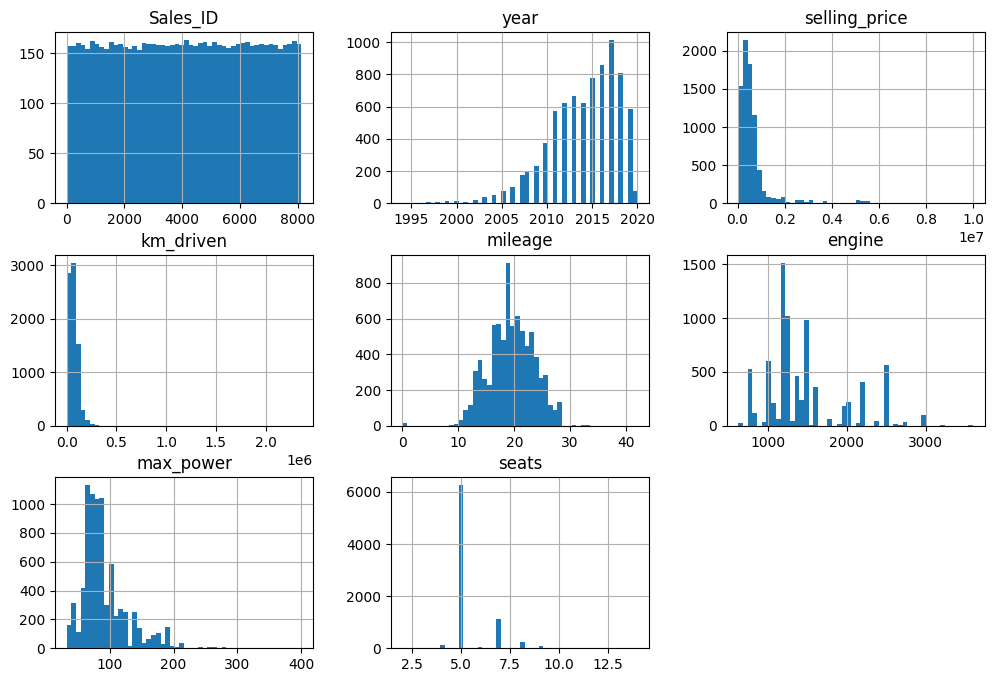

In [5]:
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(12,8))
plt.show()

In [6]:
# 결측치 확인
data.isnull().sum()

Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
sold                 0
dtype: int64

In [7]:
# 결측치가 있는 행 제거
df = data.dropna()

# 결측치 확인
df.isnull().sum()

Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
sold                 0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

# 문자열 열 선택
string_columns = df.select_dtypes(include=['object']).columns

# 각 문자열 열에 대해 Label Encoding 수행
for col in string_columns:
    le = LabelEncoder()
    df.loc[:, col] = le.fit_transform(df[col].astype(str))


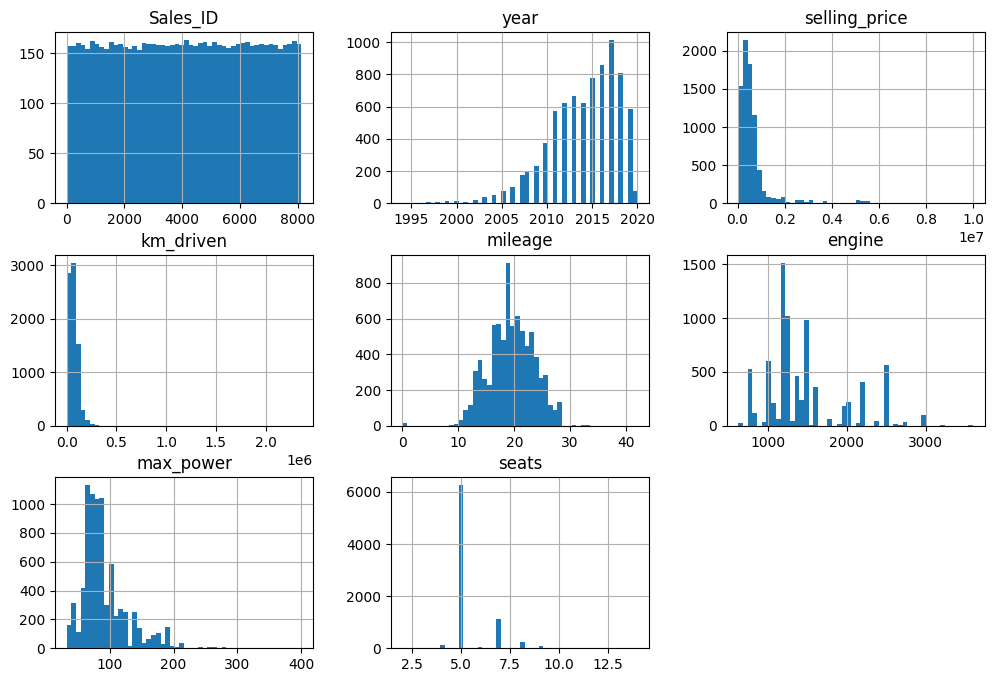

In [9]:
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(12,8))
plt.show()

<Axes: >

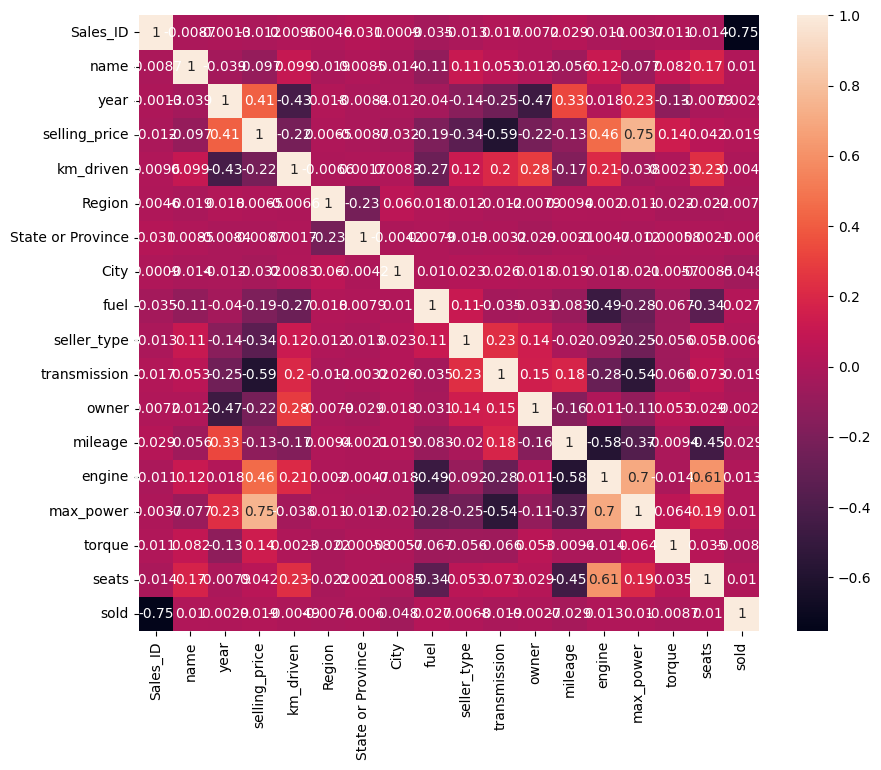

In [10]:
#히트맵
import seaborn as sns

plt.figure(figsize= (10,8))
sns.heatmap(df.corr() , annot = True)

<Axes: >

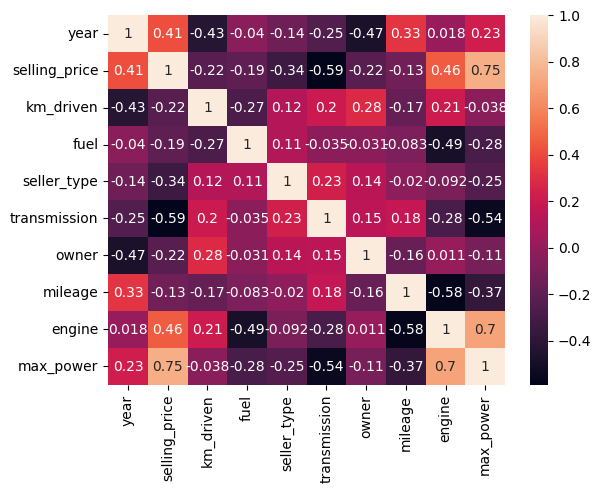

In [11]:
df1 = df[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power']].copy()
sns.heatmap(df1.corr() , annot = True)

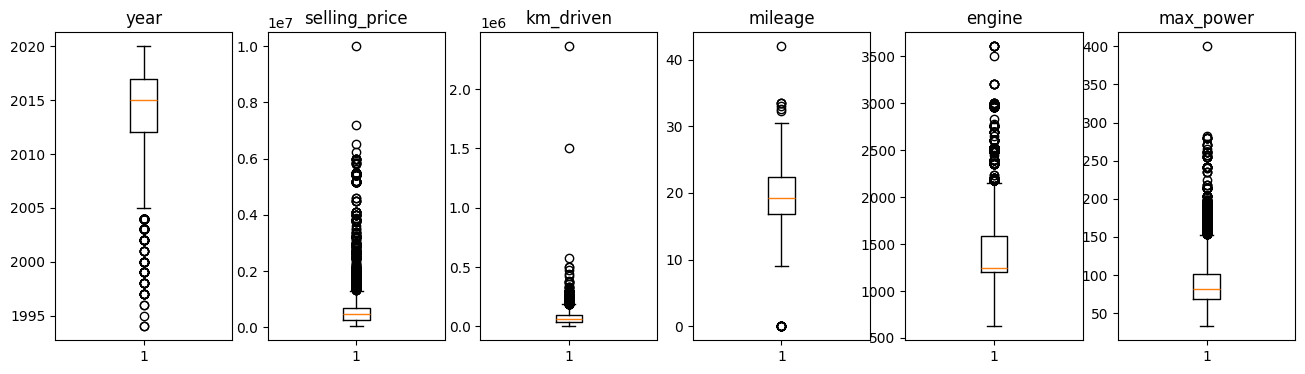

In [12]:
#outlier 

fig, ax = plt.subplots(1,6,figsize=(16,4))
ax[0].boxplot(list(df1.year))
ax[0].set_title("year")

ax[1].boxplot(list(df1.selling_price))
ax[1].set_title("selling_price")

ax[2].boxplot(list(df1.km_driven))
ax[2].set_title("km_driven")

ax[3].boxplot(list(df1.mileage))
ax[3].set_title("mileage")

ax[4].boxplot(list(df1.engine))
ax[4].set_title("engine")

ax[5].boxplot(list(df1.max_power))
ax[5].set_title("max_power")

plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


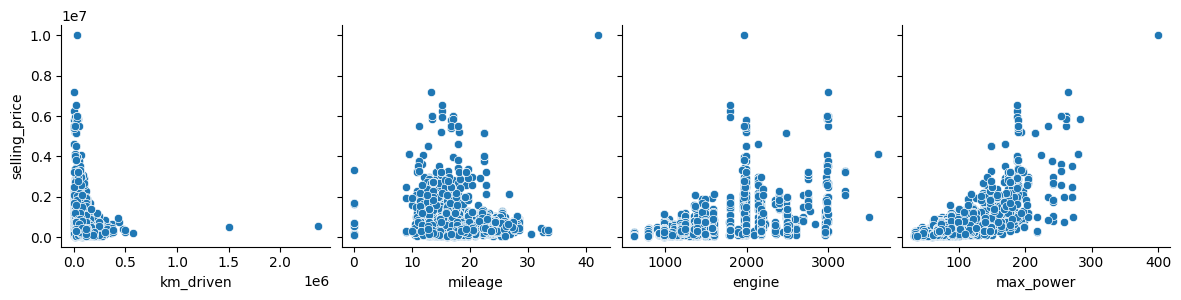

In [13]:
sns.pairplot(data=df1, x_vars=['km_driven', 'mileage', 'engine', 'max_power'], y_vars='selling_price', size=3)

In [14]:
#이상치 삭제

idx = []
lt = list(df1["km_driven"])
for i in range(len(lt)):
    if(lt[i] > 1000000):
        idx.append(i)
df1 = df1.drop(idx)
df1 = df1.reset_index(drop = True)

idx1 = []
lt = list(df1["mileage"])
for i in range(len(lt)):
    if(lt[i] > 39):
        idx1.append(i)
df1 = df1.drop(idx1)
df1 = df1.reset_index(drop = True)

idx2 = []
lt = list(df1["mileage"])
for i in range(len(lt)):
    if(lt[i] < 1):
        idx2.append(i)
df1 = df1.drop(idx2)
df1 = df1.reset_index(drop = True)

idx3 = []
lt = list(df1["max_power"])
for i in range(len(lt)):
    if(lt[i] > 350):
        idx3.append(i)
df1 = df1.drop(idx3)
df1 = df1.reset_index(drop = True)

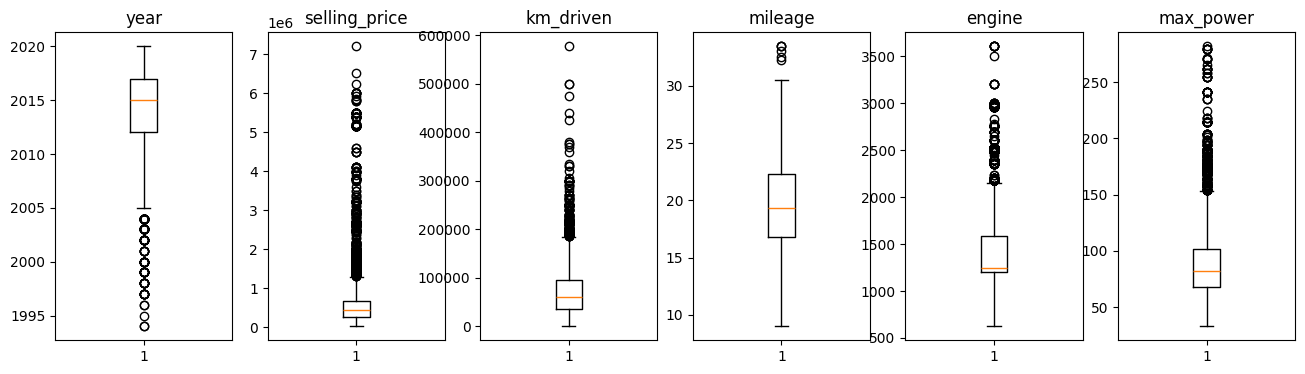

In [15]:
#outlier 

fig, ax = plt.subplots(1,6,figsize=(16,4))
ax[0].boxplot(list(df1.year))
ax[0].set_title("year")

ax[1].boxplot(list(df1.selling_price))
ax[1].set_title("selling_price")

ax[2].boxplot(list(df1.km_driven))
ax[2].set_title("km_driven")

ax[3].boxplot(list(df1.mileage))
ax[3].set_title("mileage")

ax[4].boxplot(list(df1.engine))
ax[4].set_title("engine")

ax[5].boxplot(list(df1.max_power))
ax[5].set_title("max_power")


plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


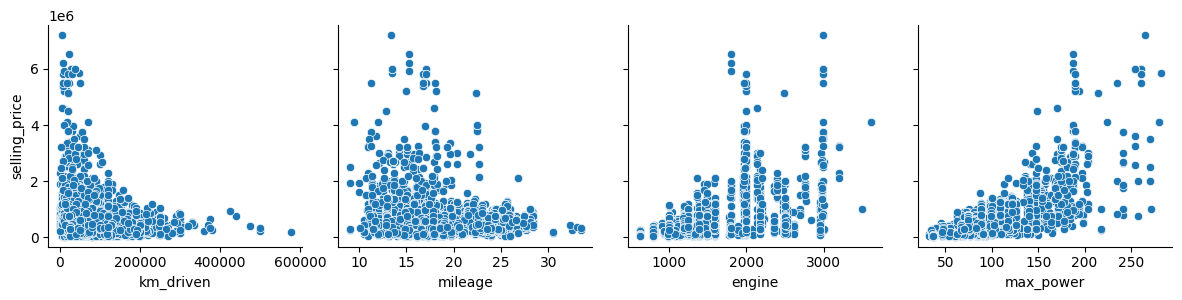

In [17]:
sns.pairplot(data=df1, x_vars=['km_driven', 'mileage', 'engine', 'max_power'], y_vars='selling_price', size=3)

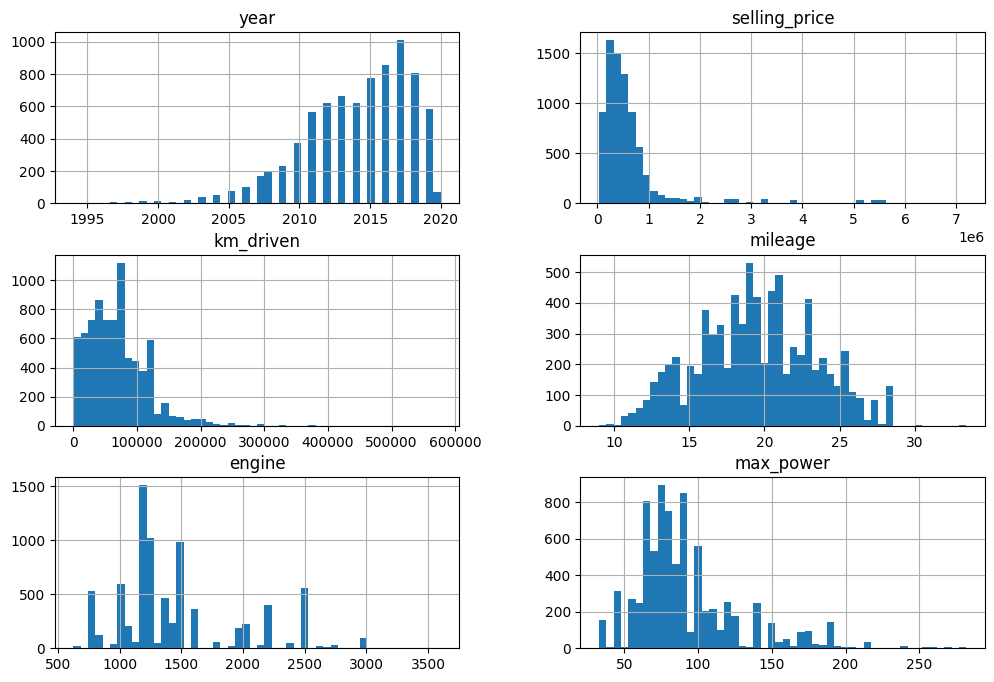

In [18]:
#표준화 전 
df1.hist(bins=50, figsize=(12,8))
plt.show()

In [19]:
#표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

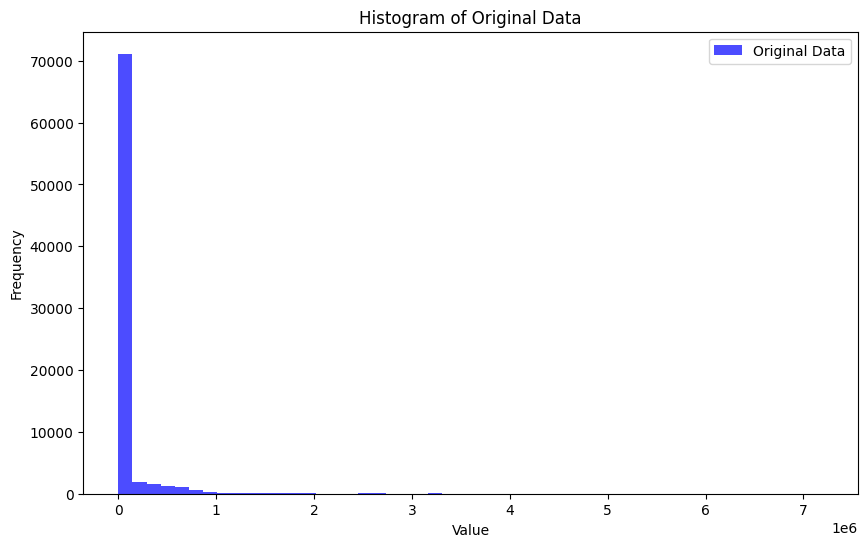

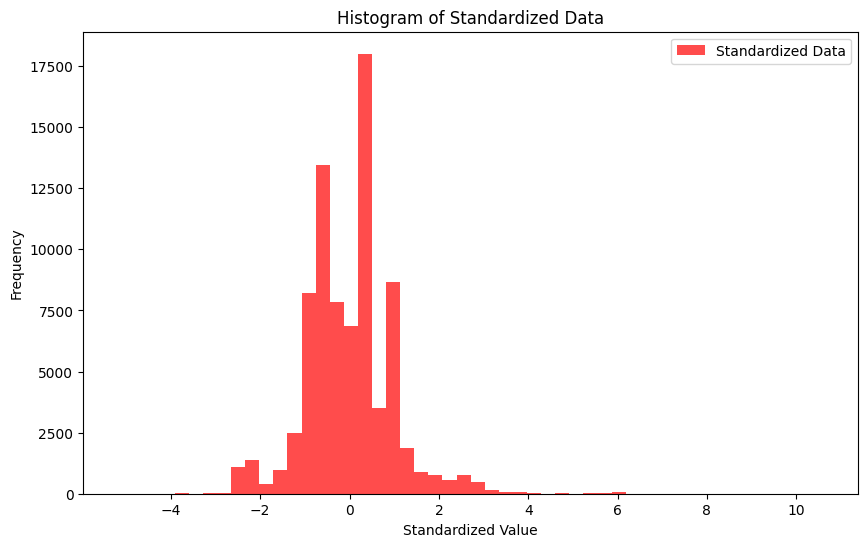

In [20]:
import matplotlib.pyplot as plt

# 기존 데이터의 히스토그램
plt.figure(figsize=(10, 6))
plt.hist(df1.values.flatten(), bins=50, color='blue', alpha=0.7, label='Original Data')
plt.title('Histogram of Original Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 표준화된 데이터의 히스토그램
plt.figure(figsize=(10, 6))
plt.hist(scaled_data.flatten(), bins=50, color='red', alpha=0.7, label='Standardized Data')
plt.title('Histogram of Standardized Data')
plt.xlabel('Standardized Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


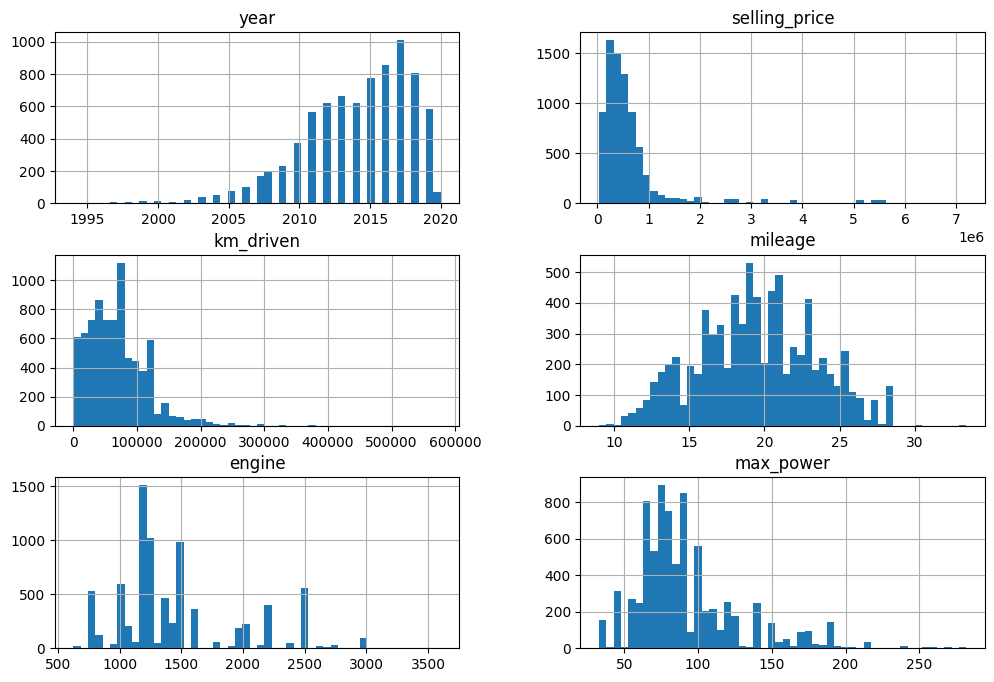

In [21]:
df1.hist(bins=50, figsize=(12,8))
plt.show()

In [29]:
# 1. 데이터 분할

X = df1.drop(columns=["selling_price"])
y = df1["selling_price"]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# 2. 전처리 파이프라인

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

numerical_features = ["year", "km_driven", "mileage","engine", "max_power"]
categorical_features = ["fuel", "seller_type", "owner", "transmission"]

numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])


categorical_transformer = Pipeline([
    ("encoder", OneHotEncoder(drop="first", handle_unknown='ignore'))  # handle_unknown 추가
])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ])

# 3. 모델 훈련
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("rf", RandomForestRegressor(random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['year', 'km_driven',
                                                   'mileage', 'engine',
                                                   'max_power']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['fuel', 'seller_type',
                                                   'owner',
                                                   'transmission'])])),
                ('rf', RandomForestRegressor(random_state=42))])

In [31]:
# 예측 및 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = pipeline.predict(X_test)


# 평균 제곱 오차(Mean Squared Error) 계산
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 평균 절대 오차(Mean Absolute Error) 계산
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# R-squared 계산
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 17600258085.02514
Mean Absolute Error: 67487.79039628585
R-squared: 0.9715004271406416


In [34]:
from sklearn.model_selection import GridSearchCV

# 튜닝할 파라미터 그리드 정의
param_grid = {
    'rf__n_estimators': [10, 50, 100],
    'rf__max_depth': [2, 10, 20],
    'rf__min_samples_split': [2, 5, 10, 20]
}

# GridSearchCV를 사용하여 파라미터 튜닝
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 모델과 파라미터 출력
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Model:", best_model)
print("Best Parameters:", best_params)

# 테스트 세트에 대한 예측 수행
y_pred = best_model.predict(X_test)

# 평균 제곱 오차(Mean Squared Error) 계산
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 평균 절대 오차(Mean Absolute Error) 계산
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# R-squared 계산
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['year', 'km_driven',
                                                   'mileage', 'engine',
                                                   'max_power']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['fuel', 'seller_type',
                                                   'owner',
                                                   

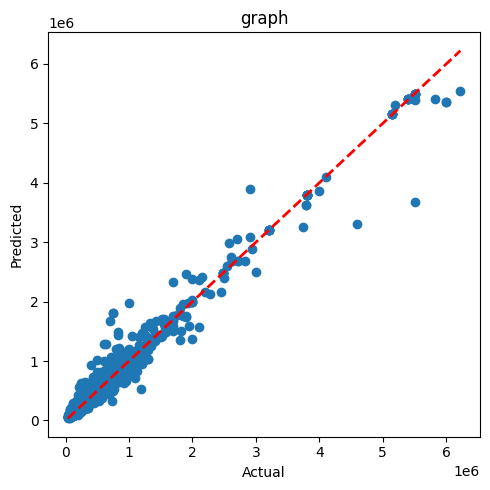

In [38]:
# 그래프 그리기
fig, (ax1) = plt.subplots(1, 1, figsize=(5, 5))


ax1.scatter(y_test, y_pred)
ax1.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('graph')

plt.tight_layout()
plt.show()

In [27]:
#from sklearn.linear_model import LinearRegression
#from sklearn.pipeline import Pipeline

## 다른 모델로 변경 (선형 회귀)
#pipeline = Pipeline([
#    ("preprocessor", preprocessor),
#    ("linear_reg", LinearRegression())
#])
#
#pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['year', 'km_driven',
                                                   'mileage', 'engine',
                                                   'max_power']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['fuel', 'seller_type',
                                                   'owner',
                                                   'transmission'])])),
                ('linear_reg', LinearRegression())])

In [28]:
## 예측 및 평가
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#y_pred = pipeline.predict(X_test)


## 평균 제곱 오차(Mean Squared Error) 계산
#mse = mean_squared_error(y_test, y_pred)
#print(f"Mean Squared Error: {mse}")

## 평균 절대 오차(Mean Absolute Error) 계산
#mae = mean_absolute_error(y_test, y_pred)
#print(f"Mean Absolute Error: {mae}")

## R-squared 계산
#r2 = r2_score(y_test, y_pred)
#print(f"R-squared: {r2}")

Mean Squared Error: 193696449624.812
Mean Absolute Error: 266149.7201085386
R-squared: 0.686353117550123
